
This tutorial will go over some basics about programming in R.  We hope that you'll get a feel for what R can do as well as learn where you can learn more to use it on your own (great resources are listed at the end).

## Getting Started with R

Although R is technically a programming language, it was developed specifically for analyzing data.  It has many built-in tools for common analysis tasks, as well as countless more available for add-on that have been developed by the R community.  Since it is a language, however, you are not limited to carrying out tasks or analyses that someone has already implemented.  R is widely-used, free, and open-source with great community support.

## Getting R/RStudio set up on your own computer

If you haven't already installed R and RStudio on your computer, please follow these instructions to get set up.

### Installing R
To set up your own computer, the first step is to install R. You can download and install R from
the [Comprehensive R Archive Network](https://cran.r-project.org/)
(CRAN). It is relatively straightforward, but if you need further help
you can try the following resources:

* [Installing R on Windows](https://github.com/genomicsclass/windows#installing-r)
* [Installing R on Mac](http://youtu.be/Icawuhf0Yqo)
* [Installing R on Ubuntu](http://cran.r-project.org/bin/linux/ubuntu/README)

### Installing RStudio

The next step is to install RStudio, a program for viewing and running R scripts. Technically you can run all the code shown here without installing RStudio, but we highly recommend this integrated
development environment (IDE). Instructions are
[here](http://www.rstudio.com/products/rstudio/download/) and for
Windows we have special
[instructions](https://github.com/genomicsclass/windows).

## The Console

Now that you have opened up Rstudio, you are ready to start working with data. Whichever approach you are using to interact with R, you should identify the console.

![](Figures/console-screen-shot.png)

When you type a line of code into the consult and hit enter the command gets _executed_. For example, try using R as a calculator by typing



In [1]:
2+3

[1] 5


We can also assign values to variables. Try the following



In [2]:
x <- 2
y <- 3
x + y

[1] 5


Note also the window above the console.  This is where you can store lines of code to be executed in a particular sequence, and these can be saved in a script (a text file with a ".R" extension) or as an R Markdown notebook (with a ".Rmd" extension) so that you can reproduce your results later or run your code on another dataset.

## The R environment

When you download R from CRAN you get what we call _base_ R. This includes several _functions_ that are considered fundamental for data analysis. It also includes several example datasets. These datasets are particularly useful as examples when we are learning to use the available functions. You can see all the available dataset by executing the function `data` like this:



In [3]:
data()


Because in R functions are objects, we need the two parenthesis to let R know that we want the function to be executed as opposed to showing us the code for the function. Type the following and note the difference:



In [4]:
data

function (..., list = character(), package = NULL, lib.loc = NULL, 
    verbose = getOption("verbose"), envir = .GlobalEnv) 
{
    fileExt <- function(x) {
        db <- grepl("\\.[^.]+\\.(gz|bz2|xz)$", x)
        ans <- sub(".*\\.", "", x)
        ans[db] <- sub(".*\\.([^.]+\\.)(gz|bz2|xz)$", "\\1\\2", 
            x[db])
        ans
    }
    names <- c(as.character(substitute(list(...))[-1L]), list)
    if (!is.null(package)) {
        if (!is.character(package)) 
            stop("'package' must be a character string or NULL")
        if (any(package %in% "base")) 
            warning("datasets have been moved from package 'base' to package 'datasets'")
        if (any(package %in% "stats")) 
            warning("datasets have been moved from package 'stats' to package 'datasets'")
        package[package %in% c("base", "stats")] <- "datasets"
    }
    paths <- find.package(package, lib.loc, verbose = verbose)
    if (is.null(lib.loc)) 
        paths <- c(path.package(package, TRUE), if (!length(package)) getwd(), 
            paths)
    paths <- unique(normalizePath(paths[file.exists(paths)]))
    paths <- paths[dir.exists(file.path(paths, "data"))]
    dataExts <- tools:::.make_file_exts("data")
    if (length(names) == 0L) {
        db <- matrix(character(), nrow = 0L, ncol = 4L)
        for (path in paths) {
            entries <- NULL
            packageName <- if (file_test("-f", file.path(path, 
                "DESCRIPTION"))) 
                basename(path)
            else "."
            if (file_test("-f", INDEX <- file.path(path, "Meta", 
                "data.rds"))) {
                entries <- readRDS(INDEX)
            }
            else {
                dataDir <- file.path(path, "data")
                entries <- tools::list_files_with_type(dataDir, 
                  "data")
                if (length(entries)) {
                  entries <- unique(tools::file_path_sans_ext(basename(entries)))
                  entries <- cbind(entries, "")
                }
            }
            if (NROW(entries)) {
                if (is.matrix(entries) && ncol(entries) == 2L) 
                  db <- rbind(db, cbind(packageName, dirname(path), 
                    entries))
                else warning(gettextf("data index for package %s is invalid and will be ignored", 
                  sQuote(packageName)), domain = NA, call. = FALSE)
            }
        }
        colnames(db) <- c("Package", "LibPath", "Item", "Title")
        footer <- if (missing(package)) 
            paste0("Use ", sQuote(paste("data(package =", ".packages(all.available = TRUE))")), 
                "\n", "to list the data sets in all *available* packages.")
        else NULL
        y <- list(title = "Data sets", header = NULL, results = db, 
            footer = footer)
        class(y) <- "packageIQR"
        return(y)
    }
    paths <- file.path(paths, "data")
    for (name in names) {
        found <- FALSE
        for (p in paths) {
            if (file_test("-f", file.path(p, "Rdata.rds"))) {
                rds <- readRDS(file.path(p, "Rdata.rds"))
                if (name %in% names(rds)) {
                  found <- TRUE
                  if (verbose) 
                    message(sprintf("name=%s:\t found in Rdata.rds", 
                      name), domain = NA)
                  thispkg <- sub(".*/([^/]*)/data$", "\\1", p)
                  thispkg <- sub("_.*$", "", thispkg)
                  thispkg <- paste0("package:", thispkg)
                  objs <- rds[[name]]
                  lazyLoad(file.path(p, "Rdata"), envir = envir, 
                    filter = function(x) x %in% objs)
                  break
                }
                else if (verbose) 
                  message(sprintf("name=%s:\t NOT found in names() of Rdata.rds, i.e.,\n\t%s\n", 
                    name, paste(names(rds), collapse = ",")), 
                    domain = NA)
            }
            if (file_test("-f", file.path(p, "Rdata.zip")


To see an example of functions at work, we will use to `co2` dataset to illustrate the function `plot`, one of the base functions. We can plot Mauna Loa Atmospheric CO2 Concentration over time like this:



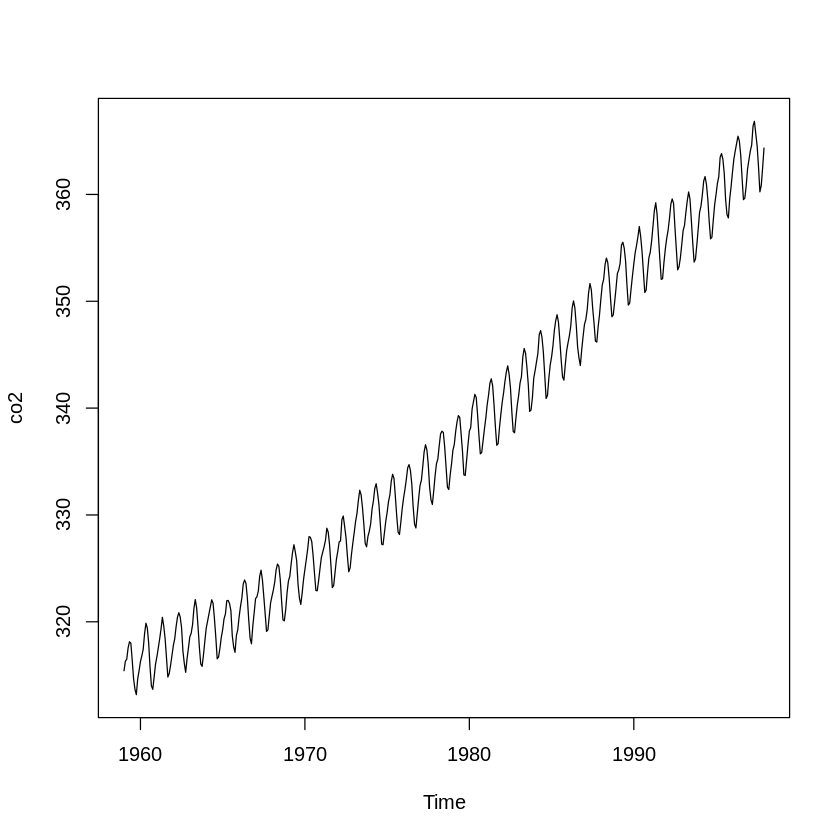

In [5]:
plot(co2)


Note that R's base functionality is bare bones. Note that data science applications are broad, the statistical toolbox is extensive, and most users need only a small fraction of all the available functionality. Therefore, a better approach is to make specific functionality available _on demand_, just like apps for smartphones.  R does this using _packages_, also called _libraries_.

Some packages are considered popular enough that they are included with the base download.
For example, the software implementing the method of survival analysis are in the `survival` package. To bring that functionality to your current session we type



In [6]:
library(survival)


However, CRAN has over 4,000 packages that are not included in the base installation. You can install these using the `install.packages` function.

### Installing Packages

To use an add-on package that is not included with base R, you'll first need to install it. The first R command we will run is `install.packages`.  Packages can be retrieved from several different repositories.  One popular repository is CRAN, where
packages are vetted: they are checked for common errors and they must have a dedicated maintainer. There are other repositories, some with more vetting, such as [Bioconductor](http://www.bioconductor.org), and no vetting, such as GitHub. You can easily install CRAN packages from within R if you know the name of the packages. As an example, if you want to install the package `dplyr`, you would use:



In [7]:
install.packages("dplyr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done



We can then load the package into our R sessions using the `library` function:



In [8]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




This step only needs to be carried out once on your machine.  This is because once you install the package, it
remains in place and only needs to be loaded with `library`. If you ever
try to load a package with the `library` command and get an error, it probably means you need to
install it first. Note that there are reasons to reinstall packages that already exist in your library (e.g., to
receive updated versions of packages).

### Getting help

A key feature you need to know about R is that you can get help for a function using `help` or `?`, like this:


In [9]:
?install.packages
help("install.packages")


These pages are quite detailed about what the function expects as input and what the function produces as output. They also include helpful examples of how to use the function at the end.

### Comments
The hash character represents comments, so text following these
characters is not interpreted:



In [10]:
##This is just a comment; nothing happens after execution.


When writing your own R scripts, it is strongly recommended that you write out comments (or include text if using an R Markdown notebook)
that explain what each section of code is doing. This is very helpful both for collaborators, and for
your future self who may have to review, run, or edit your code.

## General Programming Principles

Although there are different styles and languages of programming, in essence a piece of code is just a very detailed set of instructions.  Each language has its own set of rules and syntax.  According to Wikipedia, syntax is

>"the set of rules that defines the combinations of symbols that are considered to be a correctly structured document or fragment in that language."

Here are some general tips and pitfalls to avoid that will be useful when writing R code

####**1. Case matters**: variable names, keywords, functions, and package names are all case-sensitive



In [11]:
x <- 2
x + 8

[1] 10


####**2. Avoid using spaces**: variable names cannot contain spaces



In [12]:
my variable <- 10

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: my variable
       ^



####**3. Use comments liberally**: your future self and others will thank you




In [ ]:
# define scalar variables x and y
x <- 2
y <- 3

# add variables x and y
x + y


####**4. Pay attention to classes**: character strings, numerics, factors, matrices, lists, data.frames, etc., all behave differently in R



In [ ]:
myNumber <- factor(10)
str(myNumber)
myNumber^2
as.numeric(myNumber)^2
as.character(myNumber)^2
as.numeric(as.character(myNumber))^2


####**5. Search the documentation for answers**: when something unexpected happens, try to find out why by reading the documentation



In [ ]:
mean(c(3,4,5,NA))
?mean
mean(c(3,4,5,NA), na.rm=TRUE)


####**6. It's OK to make mistakes**: expert R programmers run into (and _learn_ from) errors all the time

Don't panic about those error messages!

## Using R for Data Science

The process of reading in data and getting it in a format for analysis is often called data "wrangling". This step may seem simple to an outside observer, but often takes up a significant proportion of the time spent on a data analysis.

### Importing Data into R

The first step when preparing to analyze data is to read in the data into R. There are several ways to do this, but we are going to focus on reading in data stored in an external Comma-Separated Value (CSV) file. This can be done with the help of the `read.csv` function.

Small datasets are often stored as Excel files.  Although there are R packages designed to read Excel (xls) format, you generally want
to avoid this and save files as comma delimited (Comma-Separated
Value/CSV) or tab delimited (Tab-Separated Value/TSV/TXT) files.
These plain-text formats are often easier for sharing, as commercial software is not required for viewing or
working with the data.

If your data is not in CSV format there are many other helpful functions that will read your data into R, such as `read.table`, `read.delim`, `download.file`.  Check out their help pages to learn more.

If you are reading in a file stored on your computer, the first step is to find the file containing your data and know its *path*.

#### Paths and the Working Directory

When you are working in R it is useful to know your _working directory_. This is the directory or folder in which R will save or look for files by default. You can see your working directory thought the console by typing:



In [ ]:
getwd()


You can also change your working directory using the function `setwd`. Or you can change it through the RStudio menus by clicking on "Session".

The functions that read and write files (there are several in R) assume you mean to look for files or write files in the working directory. Our recommended approach for beginners will have you reading and writing to the working directory. However, you can also type the [full path](http://www.computerhope.com/jargon/a/absopath.htm), which will work independently of the working directory.

As an example, let's read in one of the datasets we'll be analyzing today:



In [ ]:
rawFile <- "rawPharmacoData.csv"
if( !file.exists( rawFile ) ){
    source("downloadData.R")
}
pharmacoData <- read.csv(rawFile)


Once we have read a dataset into an _object_ (here we called it `pharmacoData`), we are ready to explore it.  What exactly is in `pharmacoData`? To check a summary of its contents, the `str()` function is handy (which stands for 'structure')



In [ ]:
str(pharmacoData)


Here we see that this object is a `data.frame`. These are one of the most widely used data types in R. They are particularly useful for storing tables.  We can also print out the top of the data frame using the `head()` function



In [ ]:
head(pharmacoData)


Another option is to open up a 'spreadsheet' tab in another RStudio window, which can be done with the `View` function:



In [ ]:
View(pharmacoData)


#### Class types

There are many different data types in R, but a list of the more common ones include:

- `data.frame`
- `vector`
- `matrix`
- `list`
- `factor`
- `character`
- `numeric`
- `integer`
- `double`

Each of them has their own properties and reading up on them will give you a better understanding of the underlying
R infrastructure. See the respective help files for additional information. To see what type of _class_ an object is
one can use the `class` function.



In [ ]:
class(pharmacoData)


#### Extracting columns

To extract columns from the data.frame we use the `$` character like this (to avoid printing the entire column to the screen, we'll add the `head` function to just print the top):



In [ ]:
head(pharmacoData$drug)


This now gives us a vector. We can access elements of the vector using the `[` symbol. Here is the 5000th element of the vector:



In [ ]:
pharmacoData$drug[5000]


#### Vectors

Vectors are a sequence of data elements of the same type (class). Many of the operations used to analyze data are applied to vectors. In R, vectors can be numeric, characters or logical.

The most basic way to creat a vector is with the function `c`


In [ ]:
x <- c(1,2,3,4,5)


Two very common ways of generating vectors are using `:` or the `seq` function:



In [ ]:
x <- 1:5
x <- seq(1,5)


Vectors can have names



In [ ]:
names(x) <- letters[1:5]
x


#### Functions

Up to now we have used prebuilt functions. However, many times we have to construct our own. We can do this in R using the `function`:



In [ ]:
avg <- function(x){
  return( sum(x) / length(x) )
}
avg( 1:5 )


## Resources

Material in this tutorial was adapted from Rafael Irizarry's _Introduction to Data Science_ course.

If you want to learn more about R after this event, a great place to start is with the [swirl](http://swirlstats.com/) tutorial, which teaches you R programming interactively, at your own pace and in the R console. Once you have R installed, you can install `swirl` and run it the following way:



In [ ]:
install.packages("swirl")
library(swirl)
swirl()


There are also many open and free resources and reference
guides for R. Two examples are:

* [Quick-R](http://www.statmethods.net/): a quick online reference for data input, basic statistics and plots
* R reference card (PDF)[https://cran.r-project.org/doc/contrib/Short-refcard.pdf] by Tom Short

#### Some Useful Books on S/R

Standard texts

-   Chambers (2008). *Software for Data Analysis*, Springer. (your
    textbook)

-   Chambers (1998). *Programming with Data*, Springer.

-   Venables & Ripley (2002). *Modern Applied Statistics with S*,
    Springer.

-   Venables & Ripley (2000). *S Programming*, Springer.

-   Pinheiro & Bates (2000). *Mixed-Effects Models in S and S-PLUS*,
    Springer.

-   Murrell (2005). *R Graphics*, Chapman & Hall/CRC Press.

Other resources

-   Springer has a series of books called *Use R!*.

-   A longer list of books is at
    http://www.r-project.org/doc/bib/R-books.html
